In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, \
                                    OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
import winsound

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

import gc
import timeit

import json
from datetime import datetime
from numba import cuda

# Preparing Data

In [3]:
X = 2*(np.pi)*np.random.uniform(-1, 1, size=120000)

In [4]:
Y = 2*(2*(np.cos(X))**2-1)**2-1

In [5]:
data_1 = pd.DataFrame({'X': X, 'Y': Y}, columns=['X', 'Y'])

In [6]:
training_data_1 = data_1.sample(frac=0.5, random_state=25)
testing_data_1 = data_1.drop(training_data_1.index)

In [7]:
training_data_1_X = training_data_1["X"]
test_data_1_X = testing_data_1["X"]
training_data_1_Y = training_data_1["Y"]
test_data_1_Y = testing_data_1["Y"]

In [8]:
training_data_1_X = tf.convert_to_tensor(training_data_1_X)

# Creating Model Architectures

In [19]:
def build_model_1_1(nb_hidden=24):
    model = Sequential()
    sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
    model.add(tf.keras.layers.Input(shape=(1,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error", optimizer=sgd, 
                  metrics=["mean_squared_error"])
    return model

In [20]:
def build_model_1_2(nb_hidden=24):
    model = Sequential()
    sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
    model.add(tf.keras.layers.Input(shape=(1,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error", optimizer=sgd, 
                  metrics=["mean_squared_error"])
    return model

In [21]:
def build_model_1_3(nb_hidden=24):
    model = Sequential()
    sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
    model.add(tf.keras.layers.Input(shape=(1,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(units = nb_hidden, activation="relu"))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error", optimizer=sgd, 
                  metrics=["mean_squared_error"])
    return model

# Running models

In [22]:
# start_time = timeit.default_timer()
scores_1 = []

num_units_1 = [24, 48, 72, 128, 256]
for num_units in num_units_1:
    model_1 = build_model_1_1(num_units)
    scores = []
    for i in range(5):
        history = model_1.fit(training_data_1_X, 
            training_data_1_Y, epochs=2000, batch_size=3000, verbose=0)
        score = model_1.evaluate(test_data_1_X, test_data_1_Y, verbose=0)
        scores.append(score[0])
    scores_1.append(min(scores))
# elapsed = timeit.default_timer() - start_time
# print("Single neural network takes:- " + str(elapsed))
model_1 = None
gc.collect()

18221

In [23]:
training_data_1_X = tf.convert_to_tensor(training_data_1_X)

In [24]:
# start_time = timeit.default_timer()
scores_2 = []
num_units_2 = [12, 24, 36]
for num_units in num_units_2:
    model_1 = build_model_1_2(num_units)
    scores = []
    for i in range(5):
#     for i in range(1):
        history = model_1.fit(training_data_1_X, 
            training_data_1_Y, epochs=2000, batch_size=3000, verbose=0)
        score = model_1.evaluate(test_data_1_X, test_data_1_Y, verbose=0)
        scores.append(score[0])
    scores_2.append(min(scores))
# elapsed = timeit.default_timer() - start_time
# print("Single neural network takes:- " + str(elapsed))
model_1 = None
gc.collect()

10917

In [25]:
# start_time = timeit.default_timer()
scores_3 = []
num_units_3 = [8, 16, 24]
for num_units in num_units_3:
    model_1 = build_model_1_3(num_units)
    scores = []
    for i in range(5):
#     for i in range(1):
        history = model_1.fit(training_data_1_X, 
            training_data_1_Y, epochs=2000, batch_size=3000, verbose=0)
        score = model_1.evaluate(test_data_1_X, test_data_1_Y, verbose=0)
        scores.append(score[0])
    scores_3.append(min(scores))
# elapsed = timeit.default_timer() - start_time
# print("Single neural network takes:- " + str(elapsed))
model_1 = None
gc.collect()

13341

# Plottting the Results

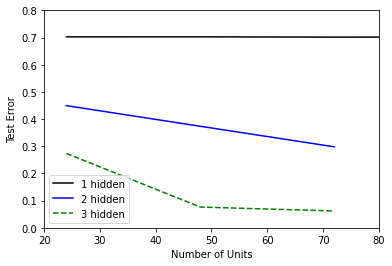

In [26]:
plt.plot(num_units_1, [np.sqrt(i) for i in scores_1], "k-", 
         [i * 2 for i in num_units_2], [np.sqrt(i) for i in scores_2], "b-", 
         [i * 3 for i in num_units_3], [np.sqrt(i) for i in scores_3], "g--")
plt.legend(["1 hidden", "2 hidden", "3 hidden"])
plt.xlim([20, 80])
plt.ylim([0, 0.8])
plt.xlabel("Number of Units")
plt.ylabel("Test Error")
plt.show()

In [ ]:
'''
We can see that deep layers with less neurons or same amount 
of neurons are performing much better than shallow neural networks
'''